In [138]:
#!cp 4-convolve_channels.py 5-convolve.py
!chmod +x *.py

(50000, 28, 28)
(50000, 26, 26)


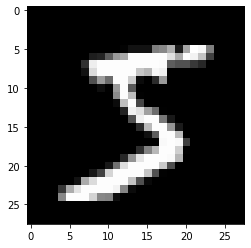

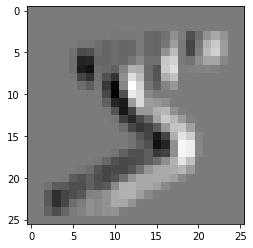

In [27]:
#!/usr/bin/env python3

import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage

#convolve_grayscale_valid = __import__('0-convolve_grayscale_valid').convolve_grayscale_valid
def convolve_grayscale_valid(images, kernel):
    """ doc """
    m, h, w = images.shape
    kh, kw = kernel.shape
    imgh, imgw = h - kh + 1, w - kw + 1
    output = np.zeros((m, imgh, imgw))
    for i in range(imgh):
        for j in range(imgw):
            output[:, i, j] = np.tensordot(images[:,
                                                  i:i+kh,
                                                  j:j+kw],
                                                  kernel)
    return output

"""for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y, x] = (kernel * image_padded[y: y+3, x: x+3]).sum()"""
if __name__ == '__main__':

    dataset = np.load('../../supervised_learning/data/MNIST.npz')
    images = dataset['X_train']
    print(images.shape)
    kernel = np.array([[1 ,0, -1], [1, 0, -1], [1, 0, -1]])
    images_conv = convolve_grayscale_valid(images, kernel)
    #print(images_conv)
    print(images_conv.shape)

    plt.imshow(images[0], cmap='gray')
    plt.show()
    plt.imshow(images_conv[0], cmap='gray')
    plt.show()

In [38]:
ar = [
        [
            [1,3,6,9],
            [1,3,6,9],
            [1,3,6,9],
            [1,3,6,9],
            [1,3,6,9],
        ],
        [
            [1,3,6,9],
            [1,3,6,9],
            [1,3,6,9],
            [1,3,6,9],
            [1,3,6,9],
        ]
    ]
import numpy as np
arr = np.array(ar)
arr.shape
k = [
    [1,2,3],
    [1,2,3],
    [1,2,3],
]
for i in range(arr.shape[0]):
    g = arr[i]
    print(g[i:i+3, i:i+3]*k)

[[ 1  6 18]
 [ 1  6 18]
 [ 1  6 18]]
[[ 3 12 27]
 [ 3 12 27]
 [ 3 12 27]]


(50000, 28, 28)
(50000, 28, 28)


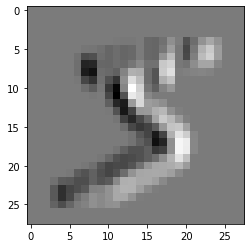

In [28]:
#!/usr/bin/env python3

import matplotlib.pyplot as plt
import numpy as np
#convolve_grayscale_same = __import__('1-convolve_grayscale_same').convolve_grayscale_same
def convolve_grayscale_same(images, kernel):
    """ doc """
    m, h, w = images.shape
    kh, kw = kernel.shape
    imghp, imgwp = kh//2, kw//2
    output = np.zeros((m, h, w))
    new = np.pad(images, ((0, 0), (imghp, imghp), (imgwp, imgwp)), 'constant')
    for i in range(h):
        for j in range(w):
            output[:, i, j] = np.tensordot(new[:,
                                         i:i+kh,
                                         j:j+kw],
                                         kernel)
    return output

if __name__ == '__main__':

    dataset = np.load('../../supervised_learning/data/MNIST.npz')
    images = dataset['X_train']
    print(images.shape)
    kernel = np.array([[1 ,0, -1], [1, 0, -1], [1, 0, -1]])
    images_conv = convolve_grayscale_same(images, kernel)
    print(images_conv.shape)

    #plt.imshow(images[0], cmap='gray')
    #plt.show()
    plt.imshow(images_conv[0], cmap='gray')
    plt.show()


(50000, 28, 28)
(50000, 30, 34)


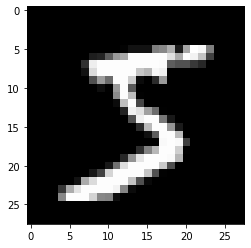

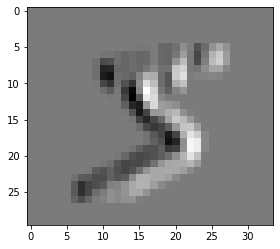

In [54]:
#!/usr/bin/env python3

import matplotlib.pyplot as plt
import numpy as np
#convolve_grayscale_padding = __import__('2-convolve_grayscale_padding').convolve_grayscale_padding
def convolve_grayscale_padding(images, kernel, padding):
    """ doc """
    m, imgh, imgw = images.shape
    kh, kw = kernel.shape
    if padding == 'same':
        imghp, imgwp = kh//2, kw//2
    if padding == 'valid':
        imghp, imgwp = 0, 0
    if type(padding) == tuple:
        imghp, imgwp = padding
    imgh, imgw = imgh - kh + 2*imghp + 1, imgw - kw + 2*imgwp + 1
    output = np.zeros((m, imgh, imgw))
    new = np.pad(images, ((0, 0), (imghp, imghp), (imgwp, imgwp)), 'constant')
    for i in range(imgh):
        for j in range(imgw):
            output[:, i, j] = np.tensordot(new[:,
                                           i:i+kh,
                                           j:j+kw],
                                           kernel)
    return output

if __name__ == '__main__':

    dataset = np.load('../../supervised_learning/data/MNIST.npz')
    images = dataset['X_train']
    print(images.shape)
    kernel = np.array([[1 ,0, -1], [1, 0, -1], [1, 0, -1]])
    images_conv = convolve_grayscale_padding(images, kernel, (2, 4))
    print(images_conv.shape)

    plt.imshow(images[0], cmap='gray')
    plt.show()
    plt.imshow(images_conv[0], cmap='gray')
    plt.show()

(50000, 28, 28)
(50000, 28, 28)


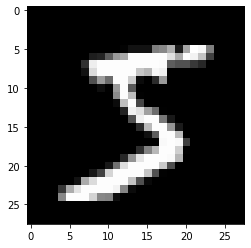

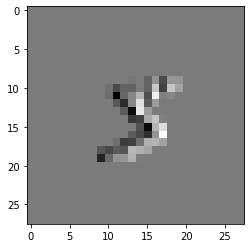

In [81]:
#!/usr/bin/env python3

import matplotlib.pyplot as plt
import numpy as np
#convolve_grayscale = __import__('3-convolve_grayscale').convolve_grayscale
def convolve_grayscale(images, kernel, padding='same', stride=(1, 1)):
    """ doc """
    m, imgh, imgw = images.shape
    kh, kw = kernel.shape
    sh, sw = stride
    if padding == 'same':
        imghp = (((imgh - 1) * sh + kh - imgh) // 2) + 1
        imgwp = (((imgw - 1) * sw + kw - imgw) // 2) + 1
    if padding == 'valid':
        imghp, imgwp = 0, 0
    if type(padding) == tuple:
        imghp, imgwp = padding
    imgh, imgw = (imgh-kh+2*imghp)//sh + 1, (imgw-kw+2*imgwp)//sw + 1
    output = np.zeros((m, imgh, imgw))
    if padding != 'valid':
        images = np.pad(images, ((0, 0),
                                 (imghp, imghp),
                                 (imgwp, imgwp)),
                        'constant')
    for i in range(imgh):
        for j in range(imgw):
            output[:, i, j] = np.tensordot(images[:,
                                           i*sh:i*sh+kh,
                                           j*sw:j*sw+kw],
                                           kernel)
    return output

if __name__ == '__main__':

    dataset = np.load('../../supervised_learning/data/MNIST.npz')
    images = dataset['X_train']
    print(images.shape)
    kernel = np.array([[1 ,0, -1], [1, 0, -1], [1, 0, -1]])
    images_conv = convolve_grayscale(images, kernel, padding='same', stride=(2, 2))
    print(images_conv.shape)

    plt.imshow(images[0], cmap='gray')
    plt.show()
    plt.imshow(images_conv[0], cmap='gray')
    plt.show()

(10000, 32, 32, 3)
(3, 3, 3)
(10000, 30, 30)


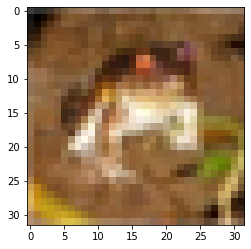

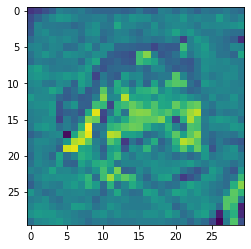

In [154]:
#!/usr/bin/env python3

import matplotlib.pyplot as plt
import numpy as np
#convolve_channels = __import__('4-convolve_channels').convolve_channels
def convolve_channels(images, kernel, padding='same', stride=(1, 1)):
    """ doc """
    m, imgh, imgw, c = images.shape
    kh, kw, kc = kernel.shape
    sh, sw = stride
    imghp, imgwp = 0, 0
    if padding == 'same':
        imghp = (((imgh - 1) * sh + kh - imgh) // 2) + 1
        imgwp = (((imgw - 1) * sw + kw - imgw) // 2) + 1
        
    if type(padding) == tuple:
        imghp, imgwp = padding
    imgh, imgw = (imgh-kh+2*imghp)//sh + 1, (imgw-kw+2*imgwp)//sw + 1
    output = np.zeros((m, imgh, imgw))
    new = np.pad(images, ((0, 0), (imghp, imghp), (imgwp, imgwp), (0, 0)), 'constant')
    for i in range(imgh):
        for j in range(imgw):
            output[:, i, j] = np.sum(new[:,
                                         i*sh:i*sh+kh,
                                         j*sw:j*sw+kw, :]
                                         *kernel, axis=(1, 2, 3))
    return output

if __name__ == '__main__':

    dataset = np.load('../../supervised_learning/data/animals_1.npz')
    images = dataset['data']
    print(images.shape)
    kernel = np.array([[
                        [0, 0, 0], [-1, -1, -1], [0, 0, 0]
                        ],
                       [
                        [-1, -1, -1], [5, 5, 5], [-1, -1, -1]
                       ],
                       [
                        [0, 0, 0], [-1, -1, -1], [0, 0, 0]
                       ]
                      ])
    print(kernel.shape)
    images_conv = convolve_channels(images, kernel, padding='valid')
    print(images_conv.shape)

    plt.imshow(images[0])
    plt.show()
    plt.imshow(images_conv[0])
    plt.show()

(10000, 32, 32, 3)
(10000, 30, 30, 3)


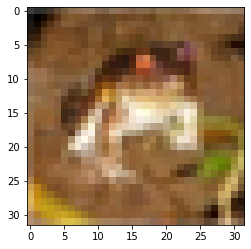

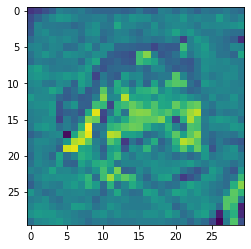

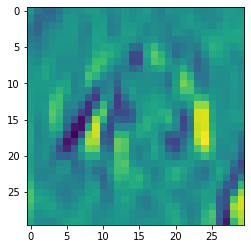

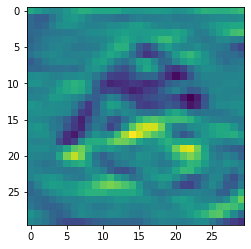

In [2]:
#!/usr/bin/env python3

import matplotlib.pyplot as plt
import numpy as np
#convolve = __import__('5-convolve').convolve
def convolve(images, kernels, padding='same', stride=(1, 1)):
    """ doc """
    m, imgh, imgw, c = images.shape
    kh, kw, kc, knc = kernels.shape
    sh, sw = stride
    imghp, imgwp = 0, 0
    if padding == 'same':
        imghp = (((imgh - 1) * sh + kh - imgh) // 2) + 1
        imgwp = (((imgw - 1) * sw + kw - imgw) // 2) + 1

    if type(padding) == tuple:
        imghp, imgwp = padding
    imgh, imgw = (imgh-kh+2*imghp)//sh + 1, (imgw-kw+2*imgwp)//sw + 1
    output = np.zeros((m, imgh, imgw, c))
    new = np.pad(images, ((0, 0), (imghp, imghp),
                          (imgwp, imgwp), (0, 0)),
                 'constant',
                 constant_values=0)
    for k in range(knc):
        for i in range(imgh):
            for j in range(imgw):
                output[:, i, j, k] = np.sum(kernels[..., k]
                                            * new[:,
                                                i*sh:i*sh+kh,
                                                j*sw:j*sw+kw, :],
                                            axis=(1, 2, 3))
    return output

if __name__ == '__main__':

    dataset = np.load('../../supervised_learning/data/animals_1.npz')
    images = dataset['data']
    print(images.shape)
    kernels = np.array([[[[0, 1, 1], [0, 1, 1], [0, 1, 1]], [[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], [[0, -1, 1], [0, -1, 1], [0, -1, 1]]],
                       [[[-1, 1, 0], [-1, 1, 0], [-1, 1, 0]], [[5, 0, 0], [5, 0, 0], [5, 0, 0]], [[-1, -1, 0], [-1, -1, 0], [-1, -1, 0]]],
                       [[[0, 1, -1], [0, 1, -1], [0, 1, -1]], [[-1, 0, -1], [-1, 0, -1], [-1, 0, -1]], [[0, -1, -1], [0, -1, -1], [0, -1, -1]]]])

    images_conv = convolve(images, kernels, padding='valid')
    print(images_conv.shape)

    plt.imshow(images[0])
    plt.show()
    plt.imshow(images_conv[0, :, :, 0])
    plt.show()
    plt.imshow(images_conv[0, :, :, 1])
    plt.show()
    plt.imshow(images_conv[0, :, :, 2])
    plt.show()